# Getting monthly deaths

## Importing required modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Loading csv file as pandas dataframe

In [2]:
usaDeath = pd.read_csv("assets/main data/florida/covid_deaths_usafacts.csv")
usaDeath.tail()

,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2021-09-07,2021-09-08,2021-09-09,2021-09-10,2021-09-11,2021-09-12,2021-09-13,2021-09-14,2021-09-15,2021-09-16
3188,56037,Sweetwater County,WY,56,0,0,0,0,0,0,...,51,51,51,51,51,51,51,51,51,51
3189,56039,Teton County,WY,56,0,0,0,0,0,0,...,11,11,11,11,11,11,11,11,11,11
3190,56041,Uinta County,WY,56,0,0,0,0,0,0,...,16,16,16,16,16,16,16,16,16,16
3191,56043,Washakie County,WY,56,0,0,0,0,0,0,...,27,27,27,27,27,27,27,27,27,27
3192,56045,Weston County,WY,56,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6


## Cropping and managing date column

In [3]:
florida = usaDeath[usaDeath["State"] == "FL"].drop(
    columns=["County Name", "State", "StateFIPS", "countyFIPS"]).transpose().diff().reset_index().rename(columns={"index": "date"})
florida['date'] = pd.to_datetime(florida["date"])
florida = florida.sort_values(by=["date"], ascending=True)
florida.tail() # tail shows the last  five rows


,date,329,330,331,332,333,334,335,336,337,...,387,388,389,390,391,392,393,394,395,396
599,2021-09-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
600,2021-09-13,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
601,2021-09-14,1552.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
602,2021-09-15,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
603,2021-09-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Modify dataframe and add month_year column

In [4]:
florida["month_year"] = florida['date'].dt.strftime("%Om-%Y")
# Changing the order of column
cols = florida.columns.tolist()
if(cols[-1] == "month_year"):
    cols.insert(1, cols[-1])
    cols.pop()
    florida = florida[cols]
florida.tail()

,date,month_year,329,330,331,332,333,334,335,336,...,387,388,389,390,391,392,393,394,395,396
599,2021-09-12,09-2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
600,2021-09-13,09-2021,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
601,2021-09-14,09-2021,1552.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
602,2021-09-15,09-2021,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
603,2021-09-16,09-2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Summation over the columns

In [5]:
florida["total_death"] = florida.iloc[:,2:].sum(axis=1)
# Changing the order of column
cols = florida.columns.tolist()
if(cols[-1] == "total_death"):
    cols.insert(2, cols[-1])
    cols.pop()
    florida = florida[cols]
floridaMainData = florida.iloc[:,:3].drop(columns=["date"])
floridaMainData

,month_year,total_death
0,01-2020,0.0
1,01-2020,0.0
2,01-2020,0.0
3,01-2020,0.0
4,01-2020,0.0
...,...,...
599,09-2021,0.0
600,09-2021,3.0
601,09-2021,1552.0
602,09-2021,5.0


## Group by the month of the year

In [6]:
floridaMonthlyDeath = floridaMainData.groupby(by="month_year").sum().reset_index()
floridaMonthlyDeath["month_year"] = pd.to_datetime(floridaMonthlyDeath["month_year"])
floridaMonthlyDeath = floridaMonthlyDeath.sort_values(by=["month_year"])
floridaMonthlyDeath


,month_year,total_death
0,2020-01-01,0.0
2,2020-02-01,0.0
4,2020-03-01,85.0
6,2020-04-01,1182.0
8,2020-05-01,1183.0
10,2020-06-01,1053.0
12,2020-07-01,3340.0
14,2020-08-01,4344.0
16,2020-09-01,3123.0
18,2020-10-01,2451.0


# Ananlyzing VIIRS average radian

## Initialize the ee and geemap modules

In [7]:
import geemap
import ee
try:
    ee.Initialize()
except:
    ee.Authenticate()


## Drawing the Chicago on map

In [8]:
floridaGeo = ee.FeatureCollection("users/amirhkiani1998/florida").geometry()


## Get VIIRS from google earth engine

In [9]:
viirs = ee.ImageCollection(
    "NOAA/VIIRS/DNB/MONTHLY_V1/VCMCFG").filterDate("2019-09-01", "2021-10-01").select("avg_rad")


In [10]:
newMap = geemap.Map()
newMap.addLayer(viirs.first().clip(floridaGeo))
newMap.centerObject(floridaGeo)
newMap


Map(center=[40, -100], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(T…

## Combine reducers to get mean, standard deviation, min, max

In [11]:
reducers = ee.Reducer.mean().combine(reducer2=ee.Reducer.stdDev(), sharedInputs=True
                                     ).combine(reducer2=ee.Reducer.min(), sharedInputs=True
                                               ).combine(reducer2=ee.Reducer.max(), sharedInputs=True)


## Map over all images in VIIRS

In [12]:
def imageClip(image):
    return image.clip(floridaGeo)


In [13]:
viirsClipped = viirs.map(imageClip)

## Change type of **clipped viirs image collection** to **list**

In [14]:
size = viirsClipped.size().getInfo()
viirsClippedList = viirsClipped.toList(count=viirsClipped.size().getInfo())

In [28]:
myMap = geemap.Map()
sampleImage = ee.Image(viirsClippedList.get(8))
myMap.addLayer(sampleImage)
print(sampleImage.date().format().getInfo())
myMap.centerObject(floridaGeo)
myMap


## Downloading data from VIIRS

In [15]:
data = []
for i in range(size):
    image = ee.Image(viirsClippedList.get(i))
    date = image.date().format().getInfo()
    stats = image.reduceRegion(reducer=reducers, bestEffort=True)
    imageData = stats.getInfo()
    imageData["date"] = date
    data.append(imageData)
    print(date)

2019-09-01T00:00:00
2019-10-01T00:00:00
2019-11-01T00:00:00
2019-12-01T00:00:00
2020-01-01T00:00:00
2020-02-01T00:00:00
2020-03-01T00:00:00
2020-04-01T00:00:00
2020-05-01T00:00:00
2020-06-01T00:00:00
2020-07-01T00:00:00
2020-08-01T00:00:00
2020-09-01T00:00:00
2020-10-01T00:00:00
2020-11-01T00:00:00
2020-12-01T00:00:00
2021-01-01T00:00:00
2021-02-01T00:00:00
2021-03-01T00:00:00
2021-05-01T00:00:00


## Make dataframe from VIIRS data

In [19]:
viirsDataframe = pd.DataFrame(data)
viirsDataframe["date"] = pd.to_datetime(viirsDataframe["date"])
viirsDataframe.head(20)

,avg_rad_max,avg_rad_mean,avg_rad_min,avg_rad_stdDev,date
0,339.720001,3.319646,0.03,10.149871,2019-09-01
1,354.260010,3.414205,0.10,9.916270,2019-10-01
2,382.350006,3.706914,0.05,10.953546,2019-11-01
3,316.040009,3.475896,-0.01,10.312463,2019-12-01
4,689.599976,3.587310,-0.19,11.302348,2020-01-01
5,385.529999,3.671529,0.15,10.724610,2020-02-01
6,315.299988,3.725892,0.00,10.954718,2020-03-01
7,345.750000,3.492491,0.15,9.859547,2020-04-01
8,339.700012,3.699444,0.12,10.339876,2020-05-01
9,306.820007,3.535817,0.08,10.064875,2020-06-01


## Save **VIIRS data** and **Florida monthly death** as csv files

In [17]:
viirsDataframe.to_csv("assets/main data/Florida/VIIRS2019_09__2021_5.csv")
floridaMonthlyDeath.to_csv("assets/main data/Florida/monthly_death.csv")


## Load the dataframes (if has not loaded yet)

In [ ]:
viirsDataframe = pd.read_csv("assets/main data/Florida/VIIRS2019_09__2021_5.csv")
floridaMonthlyDeath = pd.read_csv("assets/main data/Florida/monthly_death.csv")

## Plot avarage radian of VIIRS

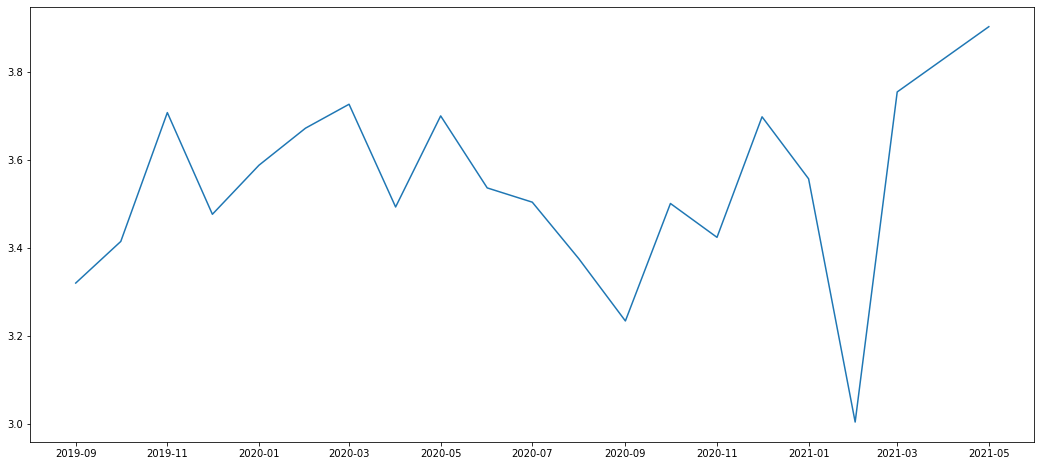

In [44]:
plt.figure(figsize=(18, 8))
plt.plot(viirsDataframe["date"], viirsDataframe["avg_rad_mean"])
plt.show()


## Standardizing **total_death** and **avg_rad_mean**

In [41]:
from sklearn.preprocessing import StandardScaler
# VIIRS Radian scaling
scalerRad = StandardScaler()
scalerRad.fit(np.array(viirsDataframe["avg_rad_mean"].values).reshape(-1, 1))
scaledRad = scalerRad.transform(
    np.array(viirsDataframe["avg_rad_mean"].values).reshape(-1, 1))

# Florida Monthly Death scaling
scalerTotalDeath = StandardScaler()
scalerTotalDeath.fit(
    np.array(floridaMonthlyDeath["total_death"].values).reshape(-1, 1))
scaledTotalDeath = scalerTotalDeath.transform(
    np.array(floridaMonthlyDeath["total_death"].values).reshape(-1, 1))

array([-1.46274118])

## Plot both average radian and Florida monthly death

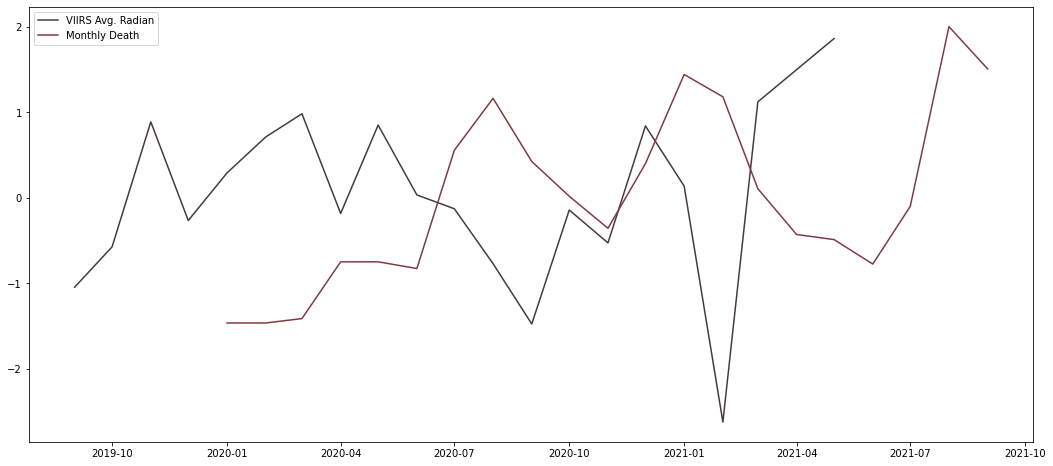

In [50]:
plt.figure(figsize=(18,8))
plt.plot(viirsDataframe["date"], scaledRad, label="VIIRS Avg. Radian", color="#463842")
plt.plot(floridaMonthlyDeath["month_year"],
         scaledTotalDeath, label="Monthly Death", color="#823842")
plt.legend()
plt.show()
